In [2]:
from tensorboard.backend.event_processing import event_accumulator
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

/home/ki/projects/work/mchad/venv/lib/python3.9/site-packages/tensorboard/plugins/distribution/compressor.py:141: RuntimeWarning: invalid value encountered in double_scalars
  return y0 + (x - x0) * float(y1 - y0) / (x1 - x0)
sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


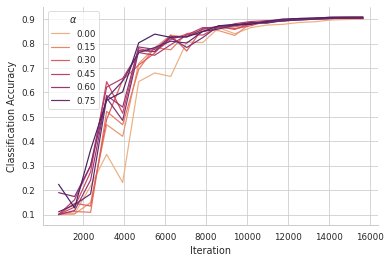

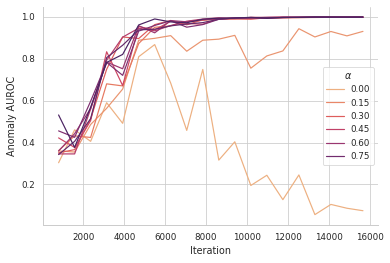

In [3]:
sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")

data = []
dfs = []

for i in range(0, 10):

    path = f"/home/ki/projects/work/mchad/logs/multiruns/mchad-vary-center-weight/{i}/tb/version_0/"
    tb = event_accumulator.EventAccumulator(path)
    tb.Reload()

    data = {}
    for scalar in tb.scalars.Keys():
        a = tb.Scalars(tag=scalar)
        # print(scalar, len(a))

        if len(a) != 20:
            continue
        vals = [a.value for a in a]
        step = [a.step for a in a]
        data[scalar] = vals
        data["step"] = step

    df = pd.DataFrame(data)
    df["$\\alpha$"] = float(float(i) / 10)
    dfs.append(df)

df = pd.concat(dfs)


sb.lineplot(data=df.reset_index(), x="step", y="Accuracy/val", hue="$\\alpha$", palette="flare")
plt.xlabel("Iteration")
plt.ylabel("Classification Accuracy")
sb.despine()
plt.savefig("out/center-acc.pgf")
plt.show()

sb.lineplot(data=df.reset_index(), x="step", y="Distance/OSR/AUROC/val", hue="$\\alpha$", palette="flare")
plt.xlabel("Iteration")
plt.ylabel("Anomaly AUROC")
sb.despine()
plt.savefig("out/center-auroc.pgf")
plt.show()

/home/ki/projects/work/mchad/venv/lib/python3.9/site-packages/tensorboard/plugins/distribution/compressor.py:141: RuntimeWarning: invalid value encountered in double_scalars
  return y0 + (x - x0) * float(y1 - y0) / (x1 - x0)


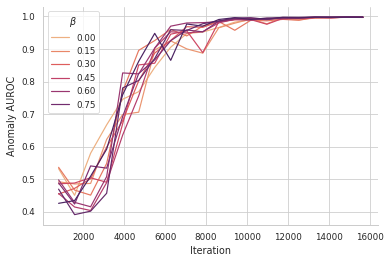

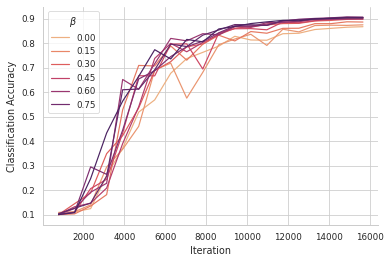

In [4]:
sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")

data = []
dfs = []

for i in range(0, 10):

    path = f"/home/ki/projects/work/mchad/logs/multiruns/cifar10-mchad-vary-weight-ce/{i}/tb/version_0/"
    tb = event_accumulator.EventAccumulator(path)
    tb.Reload()

    data = {}
    for scalar in tb.scalars.Keys():
        a = tb.Scalars(tag=scalar)
        # print(scalar, len(a))

        if len(a) != 20:
            continue
        vals = [a.value for a in a]
        step = [a.step for a in a]
        data[scalar] = vals
        data["step"] = step

    df = pd.DataFrame(data)
    df["$\\beta$"] = float(float(i) / 10)
    dfs.append(df)

df = pd.concat(dfs)


sb.lineplot(data=df.reset_index(), x="step", y="Distance/OSR/AUROC/val", hue="$\\beta$", palette="flare")
plt.xlabel("Iteration")
plt.ylabel("Anomaly AUROC")
sb.despine()
plt.savefig("out/nll-auroc.pgf")
plt.show()

sb.lineplot(data=df.reset_index(), x="step", y="Accuracy/val", hue="$\\beta$", palette="flare")
plt.xlabel("Iteration")
plt.ylabel("Classification Accuracy")
sb.despine()
plt.savefig("out/nll-acc.pgf")
plt.show()


/home/ki/projects/work/mchad/venv/lib/python3.9/site-packages/tensorboard/plugins/distribution/compressor.py:141: RuntimeWarning: invalid value encountered in double_scalars
  return y0 + (x - x0) * float(y1 - y0) / (x1 - x0)


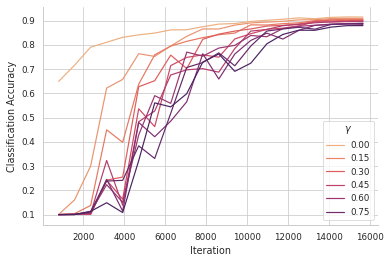

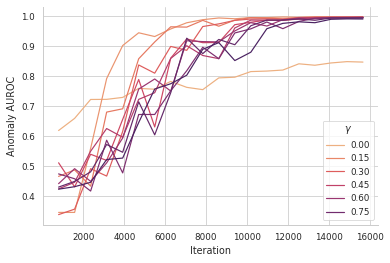

In [5]:

data = []
dfs = []

for i in range(0, 10):

    path = f"/home/ki/projects/work/mchad/logs/multiruns/machad-vary-oe-weight/{i}/tb/version_0/"
    tb = event_accumulator.EventAccumulator(path)
    tb.Reload()

    data = {}
    for scalar in tb.scalars.Keys():
        a = tb.Scalars(tag=scalar)
        # print(scalar, len(a))

        if len(a) != 20:
            continue
        vals = [a.value for a in a]
        step = [a.step for a in a]
        data[scalar] = vals
        data["step"] = step

    df = pd.DataFrame(data)
    df["$\gamma$"] = float(float(i) / 10)
    dfs.append(df)

df = pd.concat(dfs)

sb.color_palette("rocket")

sb.lineplot(data=df.reset_index(), x="step", y="Accuracy/val", hue="$\gamma$", palette="flare")
plt.xlabel("Iteration")
plt.ylabel("Classification Accuracy")
sb.despine()
plt.savefig("out/oe-acc.pgf")
plt.show()


sb.lineplot(data=df.reset_index(), x="step", y="Distance/OSR/AUROC/val", hue="$\gamma$", palette="flare")
plt.xlabel("Iteration")
plt.ylabel("Anomaly AUROC")
sb.despine()
plt.savefig("out/oe-auroc.pgf")
plt.show()

## Generate Result Tables
- MCHAD
- CAC

In [1]:
# map test cases
dataset_map = {
    "test_vs_uniformnoise": "Gauss",
    "test_vs_gaussiannoise": "Uniform",
    "test_vs_tinycrop": "Tiny Crop",
    "test_vs_tinyresize": "Tiny Resize",
    "test_vs_lsuncrop": "LSUN Crop",
    "test_vs_lsunresize": "LSUN Resize",
    "test_vs_textures": "Texture",
}

# map
model_map = {
    "src.models.CAC": "CAC",
    "src.models.Softmax": "Softmax",
    "src.models.MCHAD": "MCHAD",
    "src.models.Center": "Center",
    "src.models.II": "II",
}


In [2]:
def convert(df, key="Distance"):

    df.rename(inplace=True, columns={
        "Accuracy/test": "Accuracy",
        f"{key}/OSR/AUROC/test": "AUROC",
        f"{key}/OSR/AUPR-IN/test": "AUPR-IN",
        f"{key}/OSR/AUPR-OUT/test": "AUPR-OUT",
        f"{key}/OSR/FPR@95TPR/test": "FPR95",
    })

    return df

In [3]:
root = "/home/ki/projects/work/mchad/logs/multiruns/complete/11"

directories = [
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/11",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/3",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/1",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/7",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/0",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/9",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/8",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/2",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/5",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/10",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/4",
"./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/6",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/11",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/3",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/1",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/7",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/0",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/9",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/8",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/2",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/5",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/10",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/4",
"./17/21-12:17:51/cifar10/mchad/2021-11-17_12-17-52/6",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/11",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/3",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/1",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/7",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/0",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/9",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/8",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/2",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/5",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/10",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/4",
"./17/21-12:17:51/cifar10/ii/2021-11-17_20-21-29/6",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/11",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/3",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/1",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/7",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/0",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/9",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/8",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/2",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/5",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/10",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/4",
"./17/21-12:17:51/cifar10/cac/2021-11-17_19-04-19/6",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/11",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/3",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/1",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/7",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/0",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/9",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/8",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/2",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/5",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/10",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/4",
"./17/21-12:17:51/cifar100/mchad/2021-11-18_06-18-08/6",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/11",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/3",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/1",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/7",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/0",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/9",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/8",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/2",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/5",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/10",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/4",
"./17/21-12:17:51/cifar100/ii/2021-11-21_00-51-57/6",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/11",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/3",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/1",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/7",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/0",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/9",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/8",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/2",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/5",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/10",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/4",
"./17/21-12:17:51/cifar100/cac/2021-11-19_04-54-45/6",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/11",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/3",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/1",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/7",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/0",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/9",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/8",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/2",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/5",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/10",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/4",
"./17/21-12:17:51/svhn/softmax/2021-11-18_01-03-47/6",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/11",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/3",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/1",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/7",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/0",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/9",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/8",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/2",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/5",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/10",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/4",
"./17/21-12:17:51/svhn/mchad/2021-11-17_20-58-14/6",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/11",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/3",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/1",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/7",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/0",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/9",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/8",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/2",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/5",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/10",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/4",
"./17/21-12:17:51/svhn/ii/2021-11-18_05-14-16/6",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/11",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/3",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/1",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/7",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/0",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/9",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/8",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/2",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/5",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/10",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/4",
"./17/21-12:17:51/svhn/cac/2021-11-18_03-04-48/6",
"./24/21-09:29:34/cifar100-mchad-o/11",
"./24/21-09:29:34/cifar100-mchad-o/3",
"./24/21-09:29:34/cifar100-mchad-o/1",
"./24/21-09:29:34/cifar100-mchad-o/7",
"./24/21-09:29:34/cifar100-mchad-o/0",
"./24/21-09:29:34/cifar100-mchad-o/9",
"./24/21-09:29:34/cifar100-mchad-o/8",
"./24/21-09:29:34/cifar100-mchad-o/2",
"./24/21-09:29:34/cifar100-mchad-o/5",
"./24/21-09:29:34/cifar100-mchad-o/10",
"./24/21-09:29:34/cifar100-mchad-o/4",
"./24/21-09:29:34/cifar100-mchad-o/6",
"./24/21-09:29:34/cifar10-mchad/11",
"./24/21-09:29:34/cifar10-mchad/3",
"./24/21-09:29:34/cifar10-mchad/1",
"./24/21-09:29:34/cifar10-mchad/7",
"./24/21-09:29:34/cifar10-mchad/0",
"./24/21-09:29:34/cifar10-mchad/9",
"./24/21-09:29:34/cifar10-mchad/8",
"./24/21-09:29:34/cifar10-mchad/2",
"./24/21-09:29:34/cifar10-mchad/5",
"./24/21-09:29:34/cifar10-mchad/10",
"./24/21-09:29:34/cifar10-mchad/4",
"./24/21-09:29:34/cifar10-mchad/6",
"./24/21-09:29:34/cifar10-center/11",
"./24/21-09:29:34/cifar10-center/3",
"./24/21-09:29:34/cifar10-center/1",
"./24/21-09:29:34/cifar10-center/7",
"./24/21-09:29:34/cifar10-center/0",
"./24/21-09:29:34/cifar10-center/9",
"./24/21-09:29:34/cifar10-center/8",
"./24/21-09:29:34/cifar10-center/2",
"./24/21-09:29:34/cifar10-center/5",
"./24/21-09:29:34/cifar10-center/10",
"./24/21-09:29:34/cifar10-center/4",
"./24/21-09:29:34/cifar10-center/6",
"./24/21-09:29:34/svhn-mchad-o/11",
"./24/21-09:29:34/svhn-mchad-o/3",
"./24/21-09:29:34/svhn-mchad-o/1",
"./24/21-09:29:34/svhn-mchad-o/7",
"./24/21-09:29:34/svhn-mchad-o/0",
"./24/21-09:29:34/svhn-mchad-o/9",
"./24/21-09:29:34/svhn-mchad-o/8",
"./24/21-09:29:34/svhn-mchad-o/2",
"./24/21-09:29:34/svhn-mchad-o/5",
"./24/21-09:29:34/svhn-mchad-o/10",
"./24/21-09:29:34/svhn-mchad-o/4",
"./24/21-09:29:34/svhn-mchad-o/6",
"./24/21-09:29:34/cifar100-center/11",
"./24/21-09:29:34/cifar100-center/3",
"./24/21-09:29:34/cifar100-center/1",
"./24/21-09:29:34/cifar100-center/7",
"./24/21-09:29:34/cifar100-center/0",
"./24/21-09:29:34/cifar100-center/9",
"./24/21-09:29:34/cifar100-center/8",
"./24/21-09:29:34/cifar100-center/2",
"./24/21-09:29:34/cifar100-center/5",
"./24/21-09:29:34/cifar100-center/10",
"./24/21-09:29:34/cifar100-center/4",
"./24/21-09:29:34/cifar100-center/6",
"./24/21-09:29:34/cifar10-mchad-o/11",
"./24/21-09:29:34/cifar10-mchad-o/3",
"./24/21-09:29:34/cifar10-mchad-o/1",
"./24/21-09:29:34/cifar10-mchad-o/7",
"./24/21-09:29:34/cifar10-mchad-o/0",
"./24/21-09:29:34/cifar10-mchad-o/9",
"./24/21-09:29:34/cifar10-mchad-o/8",
"./24/21-09:29:34/cifar10-mchad-o/2",
"./24/21-09:29:34/cifar10-mchad-o/5",
"./24/21-09:29:34/cifar10-mchad-o/10",
"./24/21-09:29:34/cifar10-mchad-o/4",
"./24/21-09:29:34/cifar10-mchad-o/6",
"./24/21-09:29:34/cifar100-mchad/11",
"./24/21-09:29:34/cifar100-mchad/3",
"./24/21-09:29:34/cifar100-mchad/1",
"./24/21-09:29:34/cifar100-mchad/7",
"./24/21-09:29:34/cifar100-mchad/0",
"./24/21-09:29:34/cifar100-mchad/9",
"./24/21-09:29:34/cifar100-mchad/8",
"./24/21-09:29:34/cifar100-mchad/2",
"./24/21-09:29:34/cifar100-mchad/5",
"./24/21-09:29:34/cifar100-mchad/10",
"./24/21-09:29:34/cifar100-mchad/4",
"./24/21-09:29:34/cifar100-mchad/6",
"./24/21-09:29:34/svhn-center/11",
"./24/21-09:29:34/svhn-center/3",
"./24/21-09:29:34/svhn-center/1",
"./24/21-09:29:34/svhn-center/7",
"./24/21-09:29:34/svhn-center/0",
"./24/21-09:29:34/svhn-center/9",
"./24/21-09:29:34/svhn-center/8",
"./24/21-09:29:34/svhn-center/2",
"./24/21-09:29:34/svhn-center/5",
"./24/21-09:29:34/svhn-center/10",
"./24/21-09:29:34/svhn-center/4",
"./24/21-09:29:34/svhn-center/6",
"./24/21-09:29:34/svhn-mchad/11",
"./24/21-09:29:34/svhn-mchad/3",
"./24/21-09:29:34/svhn-mchad/1",
"./24/21-09:29:34/svhn-mchad/7",
"./24/21-09:29:34/svhn-mchad/0",
"./24/21-09:29:34/svhn-mchad/9",
"./24/21-09:29:34/svhn-mchad/8",
"./24/21-09:29:34/svhn-mchad/2",
"./24/21-09:29:34/svhn-mchad/5",
"./24/21-09:29:34/svhn-mchad/10",
"./24/21-09:29:34/svhn-mchad/4",
"./24/21-09:29:34/svhn-mchad/6"
]


In [14]:
from omegaconf import OmegaConf
import pandas as pd
from os.path import join


train_dataset_map = {
    "src.datamodules.cifar10_datamodule.CIFAR10DataModule": "CIFAR10",
    "src.datamodules.SVHNDataModule": "SVHN",
    "src.datamodules.cifar100_datamodule.CIFAR100DataModule": "CIFAR100",
}

def get_training_set(datamodule):
    target = datamodule["_target_"]
    d = train_dataset_map.get(target)

    if not d:
        if target == "src.datamodules.multi_datamodule.MultiDatamodule":
            d = train_dataset_map.get(datamodule["module1"]["_target_"])

    if not d:
        print(datamodule)
    else:
        print(d)

    return d

def load(path):
    local_df = []

    df = pd.read_csv(join(path, "results.csv"))
    metrics = pd.read_csv(join(path, "csv/version_0/metrics.csv"))
    config = OmegaConf.load(join(path, "config.yaml"))
    df["Dataset"] = get_training_set(config["datamodule"])
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    model =  str(config["model"]["_target_"])

    if model == "src.models.CAC":
        df["Model"] = "CAC"
        df = convert(df, "CAC")
    elif model == "src.models.SoftMax":
        print("EBM")
        df_ebm = df.copy(deep=True)
        df_ebm["Model"] = "EBM"
        df_emb = convert(df_ebm, "EnergyBased")

        local_df.append(df_ebm)

        print("Softmax")
        df["Model"] = "Softmax"
        df = convert(df, "Softmax")

    elif model == "src.models.MCHAD":
        if config["model"]["weight_oe"] == 0.0:
            # print(f"Weight OE: {config['model']['weight_oe']}")
            df["Model"] = "MCHAD"
        else:
            # print(f"Weight OE: {config['model']['weight_oe']}")
            df["Model"] = "GEMCHAD"

        df = convert(df)
    elif model == "src.models.Center":
        df["Model"] = "Center"
        df = convert(df, "Softmax")
    elif model == "src.models.IIModel":
        df["Model"] = "II"
        df = convert(df)
    else:
        print(f"UNKNOWN: {model}")
        return None, None

    local_df.append(df)
    return config, pd.concat(local_df), metrics

In [34]:
dfs = []

for d in directories:
        # filter(lambda x: "center" not in x and "cifar100/softmax/" not in x and "mchad-o" not in x, directories):
    path = join(root, d)
    config, df, metrics = load(path)
    try:
        if df is not None:
            print(path)
            print(f"{df['Dataset'][0]}/{df['Model'][0]} -> {df['AUROC'].mean()} {len(df)}")
            df = df[["Accuracy", "AUROC", "AUPR-IN", "AUPR-OUT", "FPR95", "Dataset", "Outliers", "Model"]]
            dfs.append(df.copy())
    except:
        print("EXCEPTION WHILE LOADING")
        print(df.columns)

df = pd.concat(dfs)
df = df.set_index(["Dataset", "Outliers", "Model"]).dropna()

CIFAR10
EBM
Softmax
/home/ki/projects/work/mchad/logs/multiruns/complete/11/./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/11
0    CIFAR10
0    CIFAR10
Name: Dataset, dtype: object/0        EBM
0    Softmax
Name: Model, dtype: object -> 0.8145950734615326 16
CIFAR10
EBM
Softmax
/home/ki/projects/work/mchad/logs/multiruns/complete/11/./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/3
0    CIFAR10
0    CIFAR10
Name: Dataset, dtype: object/0        EBM
0    Softmax
Name: Model, dtype: object -> 0.8171029218605587 16
CIFAR10
EBM
Softmax
/home/ki/projects/work/mchad/logs/multiruns/complete/11/./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/1
0    CIFAR10
0    CIFAR10
Name: Dataset, dtype: object/0        EBM
0    Softmax
Name: Model, dtype: object -> 0.8089596501418522 16
CIFAR10
EBM
Softmax
/home/ki/projects/work/mchad/logs/multiruns/complete/11/./17/21-12:17:51/cifar10/softmax/2021-11-17_17-51-14/7
0    CIFAR10
0    CIFAR10
Name: Dataset, dtype: object/0        EBM
0    Sof

In [16]:
df

Accuracy     AUROC   AUPR-IN  AUPR-OUT     FPR95
Dataset Outliers    Model                                                    
CIFAR10 Texture     EBM      0.874500  0.773270  0.832563  0.654519  0.741667
        Gauss       EBM      0.874500  0.900874  0.907874  0.895036  0.470500
        Uniform     EBM      0.874500  0.899031  0.907017  0.893075  0.479600
        Tiny Crop   EBM      0.874500  0.823798  0.826394  0.810967  0.662200
        Tiny Resize EBM      0.874500  0.799384  0.783979  0.792817  0.679400
...                               ...       ...       ...       ...       ...
SVHN    Uniform     GEMCHAD  0.959511  0.999972  0.999990  0.999917  0.000000
        Tiny Crop   GEMCHAD  0.959511  0.986529  0.994953  0.964315  0.071400
        Tiny Resize GEMCHAD  0.959511  0.999660  0.999874  0.999050  0.000700
        LSUN Crop   GEMCHAD  0.959511  0.968089  0.988005  0.905303  0.159100
        LSUN Resize GEMCHAD  0.959511  0.999573  0.999834  0.998959  0.001600

[1848 rows x 5 columns]

sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


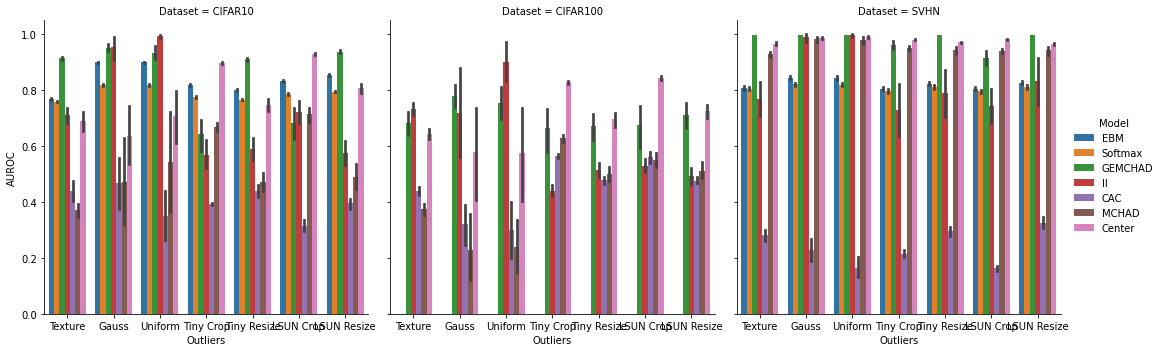

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10,5))
g = sb.catplot(data=df.reset_index(), x="Outliers", y="AUROC", hue="Model", orient="v", col="Dataset", kind="bar")

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# g.xlabel("Outlier Dataset")
# g.ylabel("Anomaly Detection AUROC (%)")
# plt.tight_layout()
plt.savefig(f"out/res.pgf", dpi=300)

In [27]:
df["AUROC"] = df["AUROC"].apply(lambda x: x * 100)
df["AUPR-IN"] = df["AUPR-IN"].apply(lambda x: x * 100)
df["AUPR-OUT"] = df["AUPR-OUT"].apply(lambda x: x * 100)
df["FPR95"] = df["FPR95"].apply(lambda x: x * 100)
df["Accuracy"] = df["Accuracy"].apply(lambda x: x * 100)

In [28]:

print(df.reset_index().groupby(by=["Dataset", "Model"]).agg(
    {
        'Accuracy': ['mean', 'std'],
        'AUROC': ['mean', 'std'],
        'AUPR-IN': ['mean', 'std'],
        'AUPR-OUT': ['mean', 'std'],
        'FPR95': ['mean', 'std'],
     }).to_latex(float_format="%.2f", multirow=True, escape=False, label="tab:results"))

\begin{table}
\centering
\label{tab:results}
\begin{tabular}{llrrrrrrrrrr}
\toprule
     &         & \multicolumn{2}{l}{Accuracy} & \multicolumn{2}{l}{AUROC} & \multicolumn{2}{l}{AUPR-IN} & \multicolumn{2}{l}{AUPR-OUT} & \multicolumn{2}{l}{FPR95} \\
     &         &     mean &     std &    mean &     std &    mean &     std &     mean &     std &    mean &     std \\
Dataset & Model &          &         &         &         &         &         &          &         &         &         \\
\midrule
\multirow{5}{*}{CIFAR10} & CAC &  9021.00 &   21.03 & 3998.04 & 1065.43 & 4393.60 &  769.71 &  5182.23 &  937.44 & 8308.59 &  847.73 \\
     & EBM &  8765.42 &   65.00 & 8395.62 &  461.56 & 8493.31 &  415.15 &  8126.59 &  808.44 & 6152.18 & 1070.06 \\
     & GEMCHAD &  8864.25 &  202.84 & 8537.55 & 1456.16 & 8440.28 & 1677.99 &  8207.80 & 1447.34 & 5668.31 & 2856.21 \\
     & II &  2883.92 &  190.97 & 7310.28 & 1793.59 & 7340.53 & 1870.66 &  7113.03 & 1777.29 & 6306.52 & 3714.70 \\
     & Softma

In [81]:

# fig, ax = plt.subplots(figsize=(10,5))
idx = (df.reset_index()["Dataset"] == "CIFAR-10") & (df.reset_index()["Outliers"] != "Texture")
_ = sb.catplot(data=df.reset_index()[idx], x="Outliers", y="AUROC", hue="Model",  orient="v", col="Dataset", kind="bar")
plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# g.xlabel("Outlier Dataset")
# g.ylabel("Anomaly Detection AUROC (%)")
# plt.tight_layout(pad=2.0)
plt.savefig(f"/home/ki/res.png", dpi=300, bbox_inches='tight')

ValueError: min() arg is an empty sequence

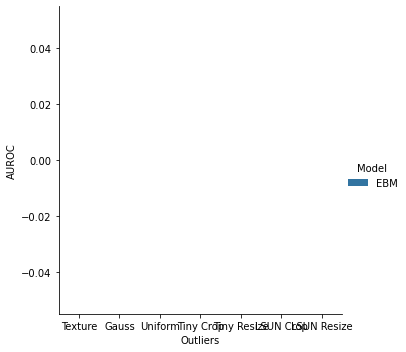

In [131]:

sb.catplot(data=df.reset_index(), x="Outliers", y="AUROC", kind="bar", hue="Model")

In [50]:
for i in range(10):
    path_vary_center = f"/home/ki/projects/work/mchad/logs/multiruns/ablation/11/22/21-11:28:39/{i}/"
    config, df, metrics = load(path)
    print(config["model"]["weight_center"])
    print(metrics[["Accuracy/val", "Distance/OSR/AUROC/val"]].dropna())
    break

CIFAR10
0.0
     Accuracy/val  Distance/OSR/AUROC/val
16         0.6383                0.669347
35         0.7468                0.701270
54         0.7836                0.700786
72         0.7955                0.692187
91         0.7996                0.726117
110        0.8362                0.748970
128        0.8537                0.775411
147        0.8522                0.762885
166        0.8692                0.783550
184        0.8600                0.788337
203        0.8806                0.819934
222        0.8893                0.819936
240        0.8880                0.807443
259        0.8921                0.829785
278        0.8951                0.819362
296        0.8991                0.835260
315        0.9027                0.837279
334        0.9040                0.844577
352        0.9065                0.845128
371        0.9062                0.845944


In [49]:
metrics.columns

Index(['lr-Adam', 'step', 'Loss/loss_center/train', 'Loss/loss_nll/train',
       'Loss/loss_out/train', 'epoch', 'Loss/loss_center/val/dataloader_idx_0',
       'Loss/loss_nll/val/dataloader_idx_0',
       'Loss/loss_out/val/dataloader_idx_0', 'Loss/loss/val/dataloader_idx_0',
       'Loss/loss_center/val/dataloader_idx_1',
       'Loss/loss_nll/val/dataloader_idx_1',
       'Loss/loss_out/val/dataloader_idx_1', 'Loss/loss/val/dataloader_idx_1',
       'Accuracy/val', 'NLL/val', 'Distance/OSR/AUROC/val',
       'Distance/OSR/AUPR-IN/val', 'Distance/OSR/AUPR-OUT/val',
       'Distance/OSR/MeanConf/known//val',
       'Distance/OSR/MeanConf/unknown//val',
       'Distance/Uncertainty/MeanConf/known//val',
       'Distance/Uncertainty/MeanConf/unknown//val', 'Accuracy/train',
       'NLL/train', 'Distance/Uncertainty/AUROC/val',
       'Distance/Uncertainty/AUPR-IN/val', 'Distance/Uncertainty/AUPR-OUT/val',
       'Distance/Uncertainty/FPR@95TPR/val',
       'Distance/Uncertainty/ACC@95T

In [27]:
df_tmp = df.reset_index()

df_tmp[(df_tmp["Model"] == "MCHAD") & (df_tmp["Dataset"] == "CIFAR10")]

,Dataset,Outliers,Model,Accuracy,AUROC,AUPR-IN,AUPR-OUT,FPR95
1512,CIFAR10,Texture,MCHAD,0.5605,0.380587,0.591109,0.316309,0.939007
1513,CIFAR10,Gauss,MCHAD,0.5605,0.927814,0.923274,0.933351,0.267900
1514,CIFAR10,Uniform,MCHAD,0.5605,0.871744,0.865617,0.882443,0.417700
1515,CIFAR10,Tiny Crop,MCHAD,0.5605,0.664681,0.680523,0.621117,0.897400
1516,CIFAR10,Tiny Resize,MCHAD,0.5605,0.499597,0.530673,0.515451,0.924200
...,...,...,...,...,...,...,...,...
1591,CIFAR10,Uniform,MCHAD,0.4993,0.470113,0.660207,0.434592,1.000000
1592,CIFAR10,Tiny Crop,MCHAD,0.4993,0.609290,0.616128,0.568424,0.928100
1593,CIFAR10,Tiny Resize,MCHAD,0.4993,0.367438,0.438708,0.410935,0.983100
1594,CIFAR10,LSUN Crop,MCHAD,0.4993,0.761503,0.787011,0.705256,0.837400


In [30]:
d2 = [
"./24/21-09:29:34/cifar10-mchad/11",
"./24/21-09:29:34/cifar10-mchad/3",
"./24/21-09:29:34/cifar10-mchad/1",
"./24/21-09:29:34/cifar10-mchad/7",
"./24/21-09:29:34/cifar10-mchad/0",
"./24/21-09:29:34/cifar10-mchad/9",
"./24/21-09:29:34/cifar10-mchad/8",
"./24/21-09:29:34/cifar10-mchad/2",
"./24/21-09:29:34/cifar10-mchad/5",
"./24/21-09:29:34/cifar10-mchad/10",
"./24/21-09:29:34/cifar10-mchad/4",
"./24/21-09:29:34/cifar10-mchad/6",
]

dfs2 = []

for d in d2:
        # filter(lambda x: "center" not in x and "cifar100/softmax/" not in x and "mchad-o" not in x, directories):
    path = join(root, d)
    config, tmp, metrics = load(path)
    try:
        if df is not None:
            tmp = tmp[["Accuracy", "AUROC", "AUPR-IN", "AUPR-OUT", "FPR95", "Dataset", "Outliers", "Model"]]
            dfs2.append(tmp.copy())
    except:
        print(path)
        print(tmp.columns)

tmp = pd.concat(dfs2)
tmp = tmp.set_index(["Dataset", "Outliers", "Model"]).dropna()

CIFAR10
CIFAR10
CIFAR10
CIFAR10
CIFAR10
CIFAR10
CIFAR10
CIFAR10
CIFAR10
CIFAR10
CIFAR10
CIFAR10


In [31]:
tmp

Accuracy     AUROC   AUPR-IN  AUPR-OUT     FPR95
Dataset Outliers    Model                                                    
CIFAR10 Texture     GEMCHAD    0.9053  0.919633  0.953341  0.843885  0.530496
        Gauss       GEMCHAD    0.9053  0.988047  0.990698  0.984984  0.040400
        Uniform     GEMCHAD    0.9053  0.996164  0.996872  0.995294  0.001600
        Tiny Crop   GEMCHAD    0.9053  0.833728  0.700009  0.875691  0.420300
        Tiny Resize GEMCHAD    0.9053  0.919321  0.902258  0.908098  0.484800
...                               ...       ...       ...       ...       ...
        Uniform     GEMCHAD    0.9114  0.998582  0.999058  0.996796  0.000000
        Tiny Crop   GEMCHAD    0.9114  0.849578  0.718560  0.884274  0.392000
        Tiny Resize GEMCHAD    0.9114  0.934178  0.918937  0.922080  0.433500
        LSUN Crop   GEMCHAD    0.9114  0.874570  0.750442  0.903686  0.334200
        LSUN Resize GEMCHAD    0.9114  0.953398  0.944945  0.944569  0.327500

[84 rows x 5 columns]